In [44]:
import pandas as pd
covid = pd.read_csv("owid-covid-data.csv", low_memory=False)

Si richiede di verificare le dimensioni del dataset e i relativi metadati

In [46]:
covid.shape

(409653, 67)

In [47]:
covid.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

Si chiede poi per ogni continente di trovare il numero di casi totali avvenuti in quello stesso continente; si chiede di non considerare eventuali locazioni che nel dataset non appartengono ad alcun continente;

In [49]:
continenti_nulli = covid.dropna(subset=['continent'])
casi_continente = continenti_nulli.groupby("continent")["total_cases"].sum()
casi_continente

continent
Africa           1.397275e+10
Asia             2.373950e+11
Europe           2.243707e+11
North America    1.210058e+11
Oceania          1.086353e+10
South America    7.012202e+10
Name: total_cases, dtype: float64

Sempre riguardo i casi totali, si chiede di scrivere del codice che, date due variabili contenenti i nomi di continenti, ne confronti i seguenti relativi descrittori statistici: valore massimo, media, e percentuale rispetto al numero dei casi totali nel mondo (calcolati anche sulle locazioni senza indicazione di continente);

In [51]:
continente1 = "Asia"
continente2 = "Africa"
casi_totali = covid["total_cases"].sum()
casi_continente1 = covid[covid["continent"] == continente1]["total_cases"]
casi_continente2 = covid[covid["continent"] == continente2]["total_cases"]

max_continente1 = casi_continente1.max()
media_continente1 = casi_continente1.mean()
percentuale_continente1 = (casi_continente1.sum()/casi_totali) * 100

max_continente2 = casi_continente2.max()
media_continente2 = casi_continente2.mean()
percentuale_continente2 = (casi_continente2.sum()/casi_totali) * 100

print(continente1,":")
print("Massimo:",max_continente1)
print("Media:",media_continente1)
print("Percentuale rispetto al mondo:",percentuale_continente1,"%")
print(continente2,":")
print("Massimo:",max_continente2)
print("Media:",media_continente2)
print("Percentuale rispetto al mondo:",percentuale_continente2,"%")

Asia :
Massimo: 99361338.0
Media: 3388162.303456741
Percentuale rispetto al mondo: 8.265565009304135 %
Africa :
Massimo: 4072719.0
Media: 159840.19710125032
Percentuale rispetto al mondo: 0.48650008404378015 %


Selezionare i dati relativi all'Italia nel 2022, e mostrare con un grafico adeguato l'evoluzione del casi totali rispetto alla data

<Axes: xlabel='date'>

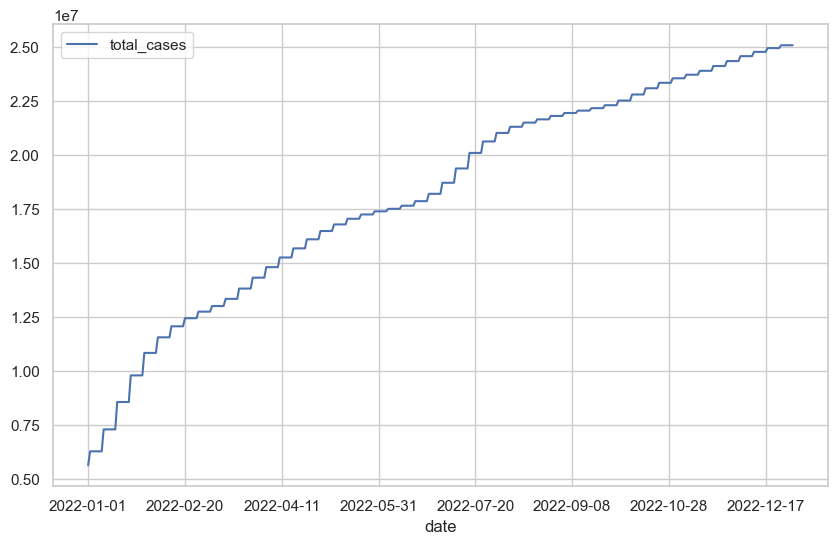

In [53]:
italia_2022 = covid.loc[(covid["location"] == "Italy") & (covid["date"].str.startswith("2022"))]
italia_2022.plot(x="date", y="total_cases",figsize=(10, 6))

Mostrare poi con un grafico adeguato il numero di nuovi casi rispetto alla data (filtrare i dati se necessario)

<Axes: xlabel='date'>

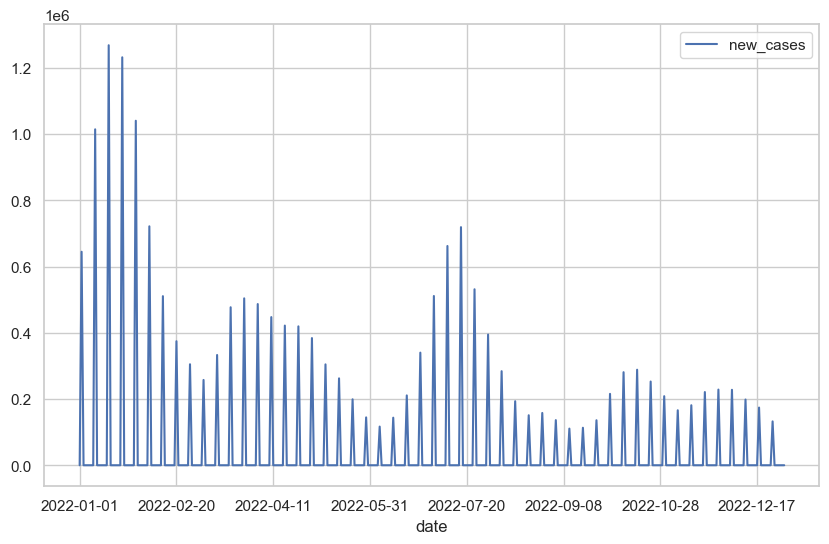

In [55]:
italia_2022.plot(x="date", y="new_cases",figsize=(10, 6))

Riguardo le nazioni di Italia, Germania e Francia, mostrare in un boxplot la differenza tra queste nazioni riguardo il numero di pazienti in terapia intensiva (Intensive Care Unit, ICU) da maggio 2022 (incluso) ad aprile 2023 (incluso)

<Axes: xlabel='Paese', ylabel='pazienti ICU'>

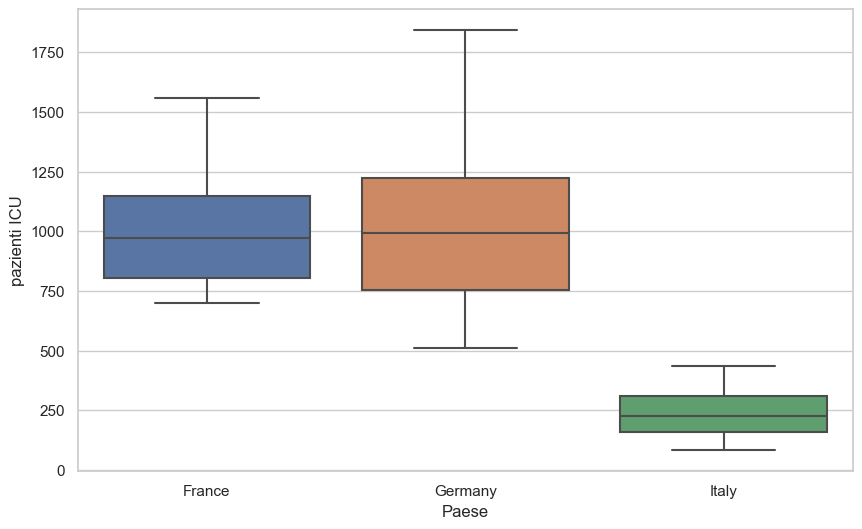

In [85]:
import seaborn as sns

paesi = ["Italy", "Germany", "France"]
data_inizio = "2022-05-01"
data_fine = "2023-04-30"

intensiva = covid.loc[(covid["location"].isin(paesi)) & (covid["date"] >= data_inizio) & (covid["date"] <= data_fine)]
intensiva.loc[:, "date"] = pd.to_datetime(intensiva["date"])

boxplot = sns.boxplot(x="location", y="icu_patients",data=intensiva)
boxplot.set_xlabel("Paese")
boxplot.set_ylabel("pazienti ICU")
boxplot.figure.set_size_inches(10, 6)
boxplot


Punti non fatti:

Mostrare infine un grafico che mostra l'andamento della somma cumulativa nuovi casi del 2022, e commentare se ci sono similarità con l'andamento del numero dei casi totali

Riguardo le nazioni di Italia, Germania, Francia e Spagna nel 2023, mostrare la somma dei pazienti ospitalizzati per ognuna — se ci sono dati nulli, suggerire se può essere possibile gestirli tramite sostituzione o meno